In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

%matplotlib inline

# read data

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# EDA

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [6]:
df_train.drop(['casual','registered'],inplace=True,axis=1)

In [7]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


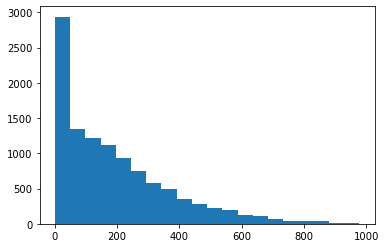

In [8]:
plt.hist(df_train['count'],bins=20)
plt.show()

In [9]:
std_3 = 3*(df_train['count'].std())
count_mean = df_train['count'].mean()
df_train = df_train.drop([x for x,y in enumerate(df_train['count']) if np.abs(y-count_mean) > std_3],axis=0)

In [10]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000,10739.000000
mean,2.500978,0.028960,0.676786,1.420710,20.130507,23.548846,62.049632,12.787706,183.003818
std,1.119043,0.167702,0.467726,0.634956,7.777571,8.463179,19.241364,8.171075,166.681429
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,47.000000,7.001500,41.000000
50%,2.000000,0.000000,1.000000,1.000000,20.500000,24.240000,62.000000,12.998000,141.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,78.000000,16.997900,276.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,734.000000


In [12]:
data = df_train.append(df_test)
data.reset_index(drop=True,inplace=True)

In [13]:
from datetime import datetime
data['date'] = data['datetime'].apply(lambda x :x.split()[0])
data['time'] = data['datetime'].apply(lambda x :x.split()[1])
data['hour'] = data['time'].apply(lambda x :x.split(':')[0]).astype('int')
data['year'] = data['date'].apply(lambda x :x.split('-')[0]).astype('int')
data['month'] = data['date'].apply(lambda x :x.split('-')[1]).astype('int')
data['weekday'] = data['date'].apply(lambda dateString: datetime.strptime(dateString,"%Y-%m-%d").weekday())

C:\Users\kojun\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kojun\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kojun\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

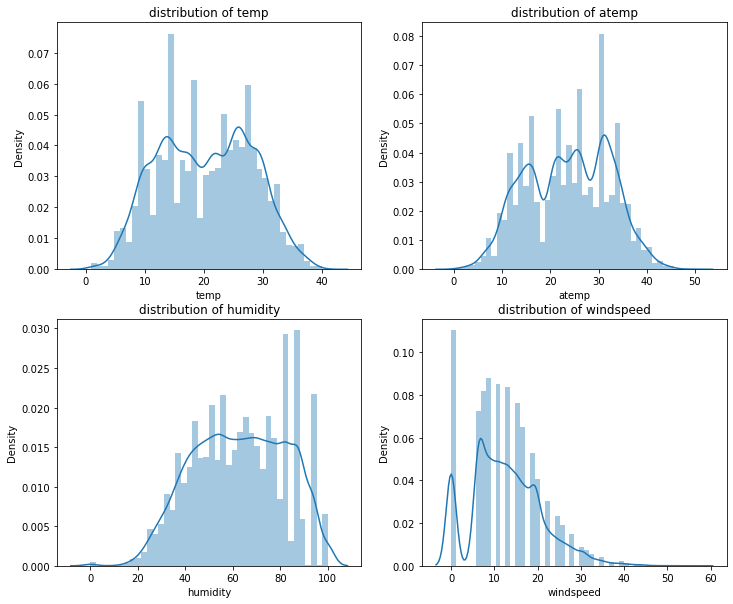

In [15]:
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)
sns.distplot(data['temp'],ax=axes[0][0])
sns.distplot(data['atemp'],ax=axes[0][1])
sns.distplot(data['humidity'],ax=axes[1][0])
sns.distplot(data['windspeed'],ax=axes[1][1])

axes[0][0].set(xlabel='temp',title='distribution of temp')
axes[0][1].set(xlabel='atemp',title='distribution of atemp')
axes[1][0].set(xlabel='humidity',title='distribution of humidity')
axes[1][1].set(xlabel='windspeed',title='distribution of windspeed')

plt.show()

# 修正windspeed

In [17]:
data_winspeed_0 = data[data['windspeed'] ==0 ]
data_winspeed_not0 = data[data['windspeed'] !=0 ]

In [18]:
predictforwinspeed_column = data_winspeed_not0[["season","weather","humidity","month","temp","year","atemp"]].values
predictforwinspeed0_column = data_winspeed_0[["season","weather","humidity","month","temp","year","atemp"]].values
rfs = RandomForestRegressor(n_estimators=1000,random_state=42)
rfs.fit(predictforwinspeed_column,data_winspeed_not0['windspeed'])
windspeed_predict = rfs.predict(predictforwinspeed0_column)

In [20]:
data_winspeed_0['windspeed'] = windspeed_predict

C:\Users\kojun\AppData\Local\Temp/ipykernel_3680/1046263128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_winspeed_0['windspeed'] = windspeed_predict


In [21]:
data_winspeed_0.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,year,month,weekday
count,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,1297.000000,2164.000000,2164.000000,2164.000000,2164.000000
mean,2.740758,0.031885,0.694085,1.371072,20.016109,24.011026,68.345656,10.655831,153.057055,10.020795,2011.488447,7.274030,2.971811
std,1.117582,0.175736,0.460900,0.584524,7.751489,7.592057,18.773604,4.040597,157.052887,7.150973,0.499982,3.418187,1.990184
min,1.000000,0.000000,0.000000,1.000000,0.820000,5.305000,16.000000,6.037991,1.000000,0.000000,2011.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.120000,17.425000,55.000000,7.352589,21.000000,4.000000,2011.000000,5.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,71.000000,9.631735,104.000000,9.000000,2011.000000,8.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,30.305000,83.000000,12.774916,235.000000,16.000000,2012.000000,10.000000,5.000000
max,4.000000,1.000000,1.000000,3.000000,39.360000,45.455000,100.000000,32.518844,731.000000,23.000000,2012.000000,12.000000,6.000000


In [22]:
data_corect = data_winspeed_not0.append(data_winspeed_0)
data_corect.reset_index(inplace=True)
data_corect.drop('index',inplace=True,axis=1)

In [23]:
data_corect.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,year,month,weekday
count,17232.000000,17232.000000,17232.000000,17232.000000,17232.000000,17232.000000,17232.000000,17232.000000,10739.000000,17232.000000,17232.000000,17232.000000,17232.000000
mean,2.498085,0.029016,0.680188,1.426764,20.315176,23.723688,62.831708,14.066881,183.003818,11.507950,2011.498317,6.527855,3.019557
std,1.108630,0.167856,0.466417,0.640080,7.888360,8.587677,19.286670,6.907108,166.681429,6.924261,0.500012,3.446353,2.004701
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,6.003200,1.000000,0.000000,2011.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,8.998100,41.000000,6.000000,2011.000000,4.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,141.000000,11.500000,2011.000000,7.000000,3.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,79.000000,19.001200,276.000000,18.000000,2012.000000,10.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,734.000000,23.000000,2012.000000,12.000000,6.000000


C:\Users\kojun\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed', ylabel='Density'>

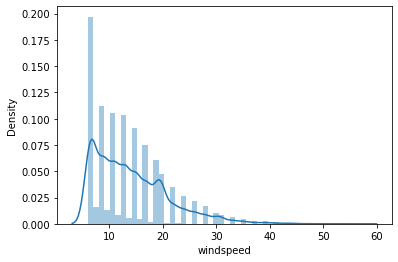

In [24]:
sns.distplot(data_corect['windspeed'])

In [25]:
train = data_corect[pd.notnull(data_corect['count'])].sort_values(by=['datetime'])
test = data_corect[~pd.notnull(data_corect['count'])].sort_values(by=['datetime'])
test_date = test['datetime']
train_y = train['count']

In [27]:
drop_feature = ['datetime','time','date','count']
train_x =train.drop(drop_feature,axis=1)
test = test.drop(drop_feature,axis=1)

# Train and Predict

In [29]:
xgb = XGBRegressor(n_estimators =10000)
xgb.fit(train_x,np.log(train_y))
predict = xgb.predict(test)

C:\Users\kojun\Anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [30]:
sub = pd.DataFrame({'datetime':test_date,'count':[max(0,x) for x in np.exp(predict)]})